In [147]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

### Establishing endpoint and parameters, submit api request, and converting to json

In [148]:
endpoint = "https://data.nashville.gov/resource/2u6v-ujjs.json?$limit=50000"

params = {'$where' : "incident_reported between '2021-01-13T00:00:00.000' and '2021-06-30T00:00:00.000'", 
}

In [149]:
response = requests.get(endpoint, params)

In [150]:
res = response.json()

### Converting response to a dataframe and cleanup
##### Modified 'incident_reported' column to only include date 
###### Converted latitude and longitude from objects to floats

In [151]:
res_trimmed = pd.DataFrame(res_trimmed, columns=['incident_reported', 'offense_description', 'latitude', 'longitude', 'zip_code'])

res_trimmed['incident_reported'] = res_trimmed['incident_reported'].str.split("T", expand=True)[0]

burglary_reports = res_trimmed[res_trimmed['offense_description'].str.contains('BURGLARY- AGGRAVATED')]

burglary_reports.head()

,incident_reported,offense_description,latitude,longitude,zip_code
199,2021-01-13,BURGLARY- AGGRAVATED,36.06,-86.95,NaN
310,2021-01-14,BURGLARY- AGGRAVATED,36.19,-86.75,NaN
434,2021-01-14,BURGLARY- AGGRAVATED,36.18,-86.75,NaN
450,2021-01-14,BURGLARY- AGGRAVATED,36.04,-86.73,NaN
495,2021-01-14,BURGLARY- AGGRAVATED,36.16,-86.85,NaN


In [152]:
burglary_reports[['latitude', 'longitude']] = burglary_reports[['latitude', 'longitude']].apply(pd.to_numeric);

burglary_reports.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 199 to 48865
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_reported    984 non-null    object 
 1   offense_description  984 non-null    object 
 2   latitude             982 non-null    float64
 3   longitude            982 non-null    float64
 4   zip_code             145 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.1+ KB


C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Downloaded census tract data and uploaded code

In [153]:
census_tract = gpd.read_file('data/tl_2019-47_tract/tl_2019_47_tract.shp')
type(census_tract)

geopandas.geodataframe.GeoDataFrame

In [154]:
print(census_tract.crs)
census_tract.head()

epsg:4269


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


In [155]:
#leg_kwds = {'title': 'Census Tracts', 'loc':'upper left', 
#            'bbox_to_anchor': (0, 0), 'ncol': 9}

#census_tract.plot(column = 'NAME', figsize=(15, 15), edgecolor = 'black',
#                 legend = True, legend_kwds = leg_kwds, cmap = 'terrain')

### Created appropriate 'geometry' column with Point(long, lat) format and converted to GeoDataFrame

In [156]:
burglary_reports['geometry'] = burglary_reports.apply(lambda x: Point((x.longitude,
                                                                      x.latitude)),
                                                     axis=1)

burglary_reports.head()

C:\Users\Conrad\AppData\Local\Temp/ipykernel_28024/3948901756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_reports['geometry'] = burglary_reports.apply(lambda x: Point((x.longitude,


,incident_reported,offense_description,latitude,longitude,zip_code,geometry
199,2021-01-13,BURGLARY- AGGRAVATED,36.06,-86.95,NaN,POINT (-86.95 36.06)
310,2021-01-14,BURGLARY- AGGRAVATED,36.19,-86.75,NaN,POINT (-86.75 36.19)
434,2021-01-14,BURGLARY- AGGRAVATED,36.18,-86.75,NaN,POINT (-86.75 36.18)
450,2021-01-14,BURGLARY- AGGRAVATED,36.04,-86.73,NaN,POINT (-86.73 36.04)
495,2021-01-14,BURGLARY- AGGRAVATED,36.16,-86.85,NaN,POINT (-86.84999999999999 36.16)


In [157]:
burglary_geo = gpd.GeoDataFrame(burglary_reports,
                               crs=census_tract.crs,
                               geometry = burglary_reports['geometry'])

### Paired down census_tract usable columns and joined with burglary_geo data

In [158]:
census_tract = census_tract[['COUNTYFP', 'TRACTCE', 'NAME', 'geometry']]
#census_tract['COUNTYFP'] = census_tract['COUNTYFP'].apply(pd.to_numeric)
#census_tract = census_tract[census_tract['COUNTYFP'] == 37]
census_tract.head()

,COUNTYFP,TRACTCE,NAME,geometry
0,165,021002,210.02,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,165,020901,209.01,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,165,020300,203,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,165,020902,209.02,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,165,020800,208,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


In [159]:
burglary_by_tract = gpd.sjoin(burglary_geo, census_tract, op = 'within')

In [160]:
burglary_by_tract.drop_duplicates(subset='geometry', inplace=True)
burglary_by_tract = burglary_by_tract.drop(columns='index_right')
burglary_by_tract.head()

,incident_reported,offense_description,latitude,longitude,zip_code,geometry,COUNTYFP,TRACTCE,NAME
199,2021-01-13,BURGLARY- AGGRAVATED,36.06,-86.95,NaN,POINT (-86.95000 36.06000),037,018407,184.07
14375,2021-03-05,BURGLARY- AGGRAVATED,36.07,-86.99,NaN,POINT (-86.99000 36.07000),037,018407,184.07
310,2021-01-14,BURGLARY- AGGRAVATED,36.19,-86.75,NaN,POINT (-86.75000 36.19000),037,011700,117
2779,2021-01-22,BURGLARY- AGGRAVATED,36.19,-86.74,NaN,POINT (-86.74000 36.19000),037,011700,117
434,2021-01-14,BURGLARY- AGGRAVATED,36.18,-86.75,NaN,POINT (-86.75000 36.18000),037,011900,119


In [161]:
census_tract_names = burglary_by_tract['NAME']
census_tract_names = pd.DataFrame(census_tract_names)
polygon_nash = pd.merge(census_tract, census_tract_names, on = 'NAME')
polygon_nash.drop_duplicates(subset='NAME')

,COUNTYFP,TRACTCE,NAME,geometry
0,037,010106,101.06,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
2,037,010104,101.04,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
10,037,013300,133,"POLYGON ((-86.86843 36.16436, -86.86836 36.164..."
14,037,018102,181.02,"POLYGON ((-86.88737 36.11771, -86.88733 36.117..."
16,031,980100,9801,"POLYGON ((-86.15980 35.36284, -86.15978 35.362..."
...,...,...,...,...
515,037,018904,189.04,"POLYGON ((-86.73805 36.06626, -86.73780 36.066..."
517,037,018905,189.05,"POLYGON ((-86.74457 36.05547, -86.74447 36.055..."
518,037,013601,136.01,"POLYGON ((-86.84383 36.16325, -86.84375 36.163..."
522,037,018301,183.01,"POLYGON ((-87.03820 36.09382, -87.03819 36.093..."


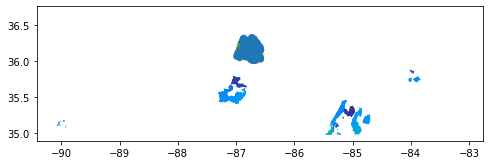

In [163]:
ax = polygon_nash.plot(column='TRACTCE', figsize = (8, 10), cmap='terrain')
burglary_by_tract.plot(ax = ax, column = 'offense_description')
plt.show();

In [164]:
with open('data/data_census.json') as fi:
    credentials = json.load(fi)
       
api_key = credentials['api_key']


In [165]:
endpoint = "https://api.census.gov/data/2019/acs/acs5"
params = {
       'get' : 'NAME,B01001_001E',
       'for' : 'tract:*',
       'in'  : ['state:47', 'county:037'],
       'key' : api_key
}


In [166]:
response = requests.get(endpoint, params=params)
response.url


'https://api.census.gov/data/2019/acs/acs5?get=NAME%2CB01001_001E&for=tract%3A%2A&in=state%3A47&in=county%3A037&key=3118f5907a4f79a26f2f7e85d3a851aee8f9e855'

In [167]:
res = response.json()
res = pd.DataFrame(res)
res

,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631
2,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804
3,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701
4,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702
...,...,...,...,...,...
157,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613
158,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620
159,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100
160,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400
